In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\tadak\OneDrive\Desktop\Data analysis\work\Challenge\Project\project\case_death_test_dataset.csv"
data = pd.read_csv(file_path)


In [57]:
# Convert the ISO_START_DATE column to datetime format
data['ISO_START_DATE'] = pd.to_datetime(data['ISO_START_DATE'])

# Select a few countries for comparison
countries_to_compare = ['China', 'United States of America', 'India', 'France', 'Germany']

# Filter the data for the selected countries
filtered_data = data[data['COUNTRY_NAME'].isin(countries_to_compare)]

# Group by date and country, and sum the cases to get the daily cases for each country
daily_cases_countries = filtered_data.groupby(['ISO_START_DATE', 'COUNTRY_NAME'])['DAILY_CASES'].sum().reset_index()

# Pivot the data to have countries as columns for cases
pivot_daily_cases = daily_cases_countries.pivot(index='ISO_START_DATE', columns='COUNTRY_NAME', values='DAILY_CASES')

# Group by date and country, and sum the deaths to get the daily deaths for each country
daily_deaths_countries = filtered_data.groupby(['ISO_START_DATE', 'COUNTRY_NAME'])['DAILY_CASES_DEATHS'].sum().reset_index()

# Pivot the data to have countries as columns for deaths
pivot_daily_deaths = daily_deaths_countries.pivot(index='ISO_START_DATE', columns='COUNTRY_NAME', values='DAILY_CASES_DEATHS')


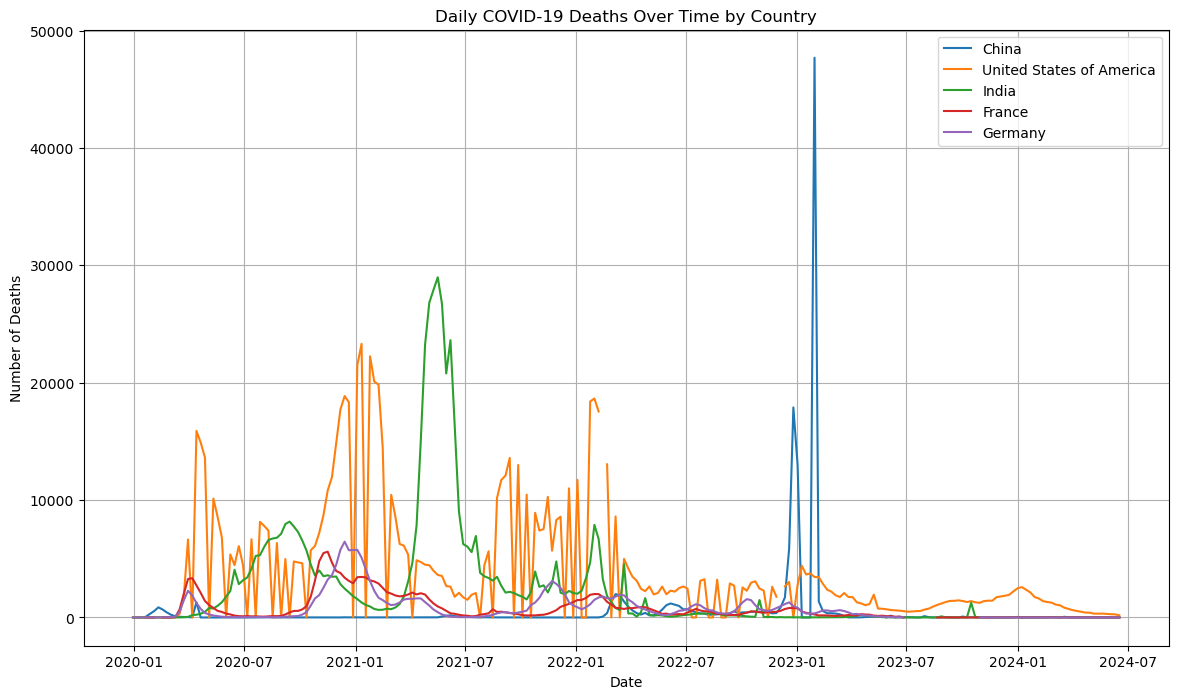

In [58]:
# Plot the trend of daily deaths over time for the selected countries
plt.figure(figsize=(14, 8))

for country in countries_to_compare:
    plt.plot(pivot_daily_deaths.index, pivot_daily_deaths[country], label=country)

plt.title('Daily COVID-19 Deaths Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Ensure the ISO_START_DATE is in datetime format
data['ISO_START_DATE'] = pd.to_datetime(data['ISO_START_DATE'])

# Group by country and sum the deaths
total_deaths_per_country = data.groupby('COUNTRY_NAME')['DAILY_CASES_DEATHS'].sum().reset_index()
# Sort the countries by total deaths in descending order and select the top five
top_five_countries_deaths = total_deaths_per_country.sort_values(by='DAILY_CASES_DEATHS', ascending=False).head(5)
print(top_five_countries_deaths)



                 COUNTRY_NAME  DAILY_CASES_DEATHS
230  United States of America            907430.0
36                     Brazil            702116.0
110                     India            533621.0
182        Russian Federation            403072.0
150                    Mexico            335011.0


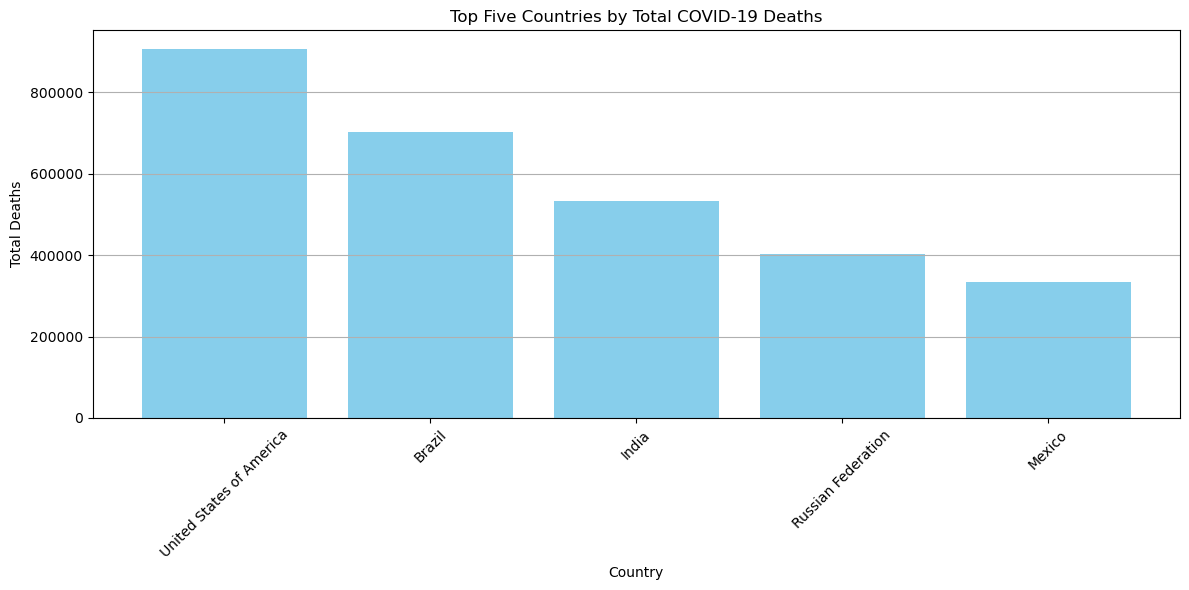

In [60]:
# Create a bar graph for the top five countries with the highest total COVID-19 deaths
plt.figure(figsize=(12, 6))
plt.bar(top_five_countries_deaths['COUNTRY_NAME'], top_five_countries_deaths['DAILY_CASES_DEATHS'], color='skyblue')
plt.title('Top Five Countries by Total COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


                 COUNTRY_NAME  DAILY_CASES
55                      China   99361338.0
230  United States of America   72385622.0
110                     India   45040284.0
85                     France   38997490.0
93                    Germany   38437756.0


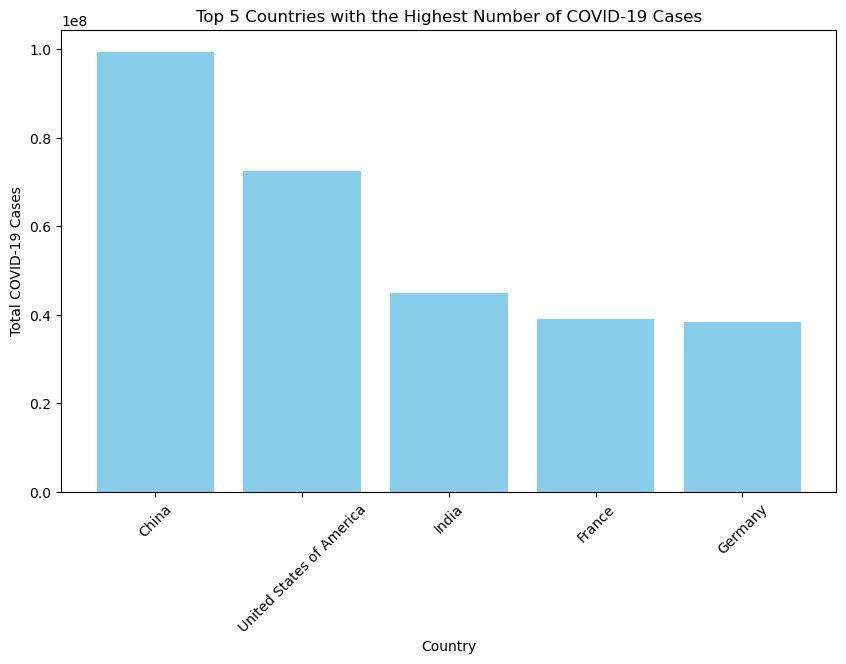

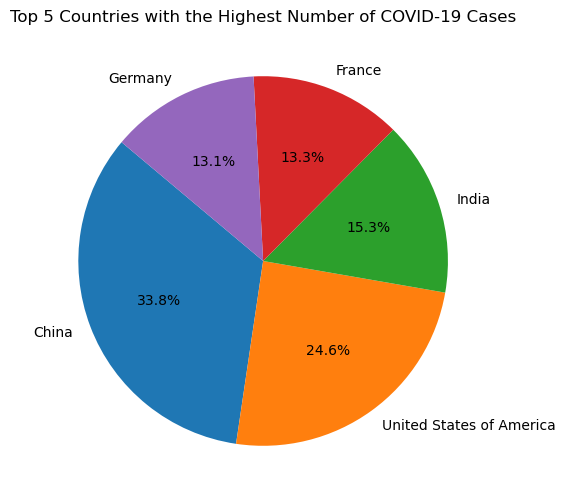

In [61]:
# Filter relevant columns
data = data[['ISO_START_DATE', 'COUNTRY_NAME', 'DAILY_CASES']]

# Convert ISO_START_DATE to datetime
data['ISO_START_DATE'] = pd.to_datetime(data['ISO_START_DATE'])

# Group data by country and sum daily cases
total_cases_by_country = data.groupby('COUNTRY_NAME')['DAILY_CASES'].sum().reset_index()

# Sort by total cases and get the top five countries
top_five_countries = total_cases_by_country.sort_values(by='DAILY_CASES', ascending=False).head(5)

# Print the top five countries with the highest number of cases
print(top_five_countries)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_five_countries['COUNTRY_NAME'], top_five_countries['DAILY_CASES'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Cases')
plt.title('Top 5 Countries with the Highest Number of COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_five_countries['DAILY_CASES'], labels=top_five_countries['COUNTRY_NAME'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries with the Highest Number of COVID-19 Cases')
plt.show()
